<h1><center> MODEL TIDAK STASIONER </center></h1><center>Laily Nissa A.M </center>

<center>
_____________________________________________________________________________________________________________________________
</center>


Deret waktu tidak stasioner memiliki bentuk:

<center> $Y_t=\mu_t+X_t$ </center>

dengan $\mu_t$ merupakan suatu fungsi nilai tengah yang tidak konstan dan $X_t$ merupakan deret stasioner dengan nilai tengah nol.

Berikut beberapa contoh deret waktu yang tidak stasioner

In [1]:
!pip install pydataset
!pip install PythonTsa

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from statsmodels.datasets import get_rdataset
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from PythonTsa.plot_acf_pacf import acf_pacf_fig

import warnings
warnings.filterwarnings("ignore")

In [3]:
djf=get_rdataset('DJFranses',package='AER').data
elec=get_rdataset('usmelec',package='fpp2').data
gas=get_rdataset('gas',package='forecast').data
johnson=data('JohnsonJohnson')

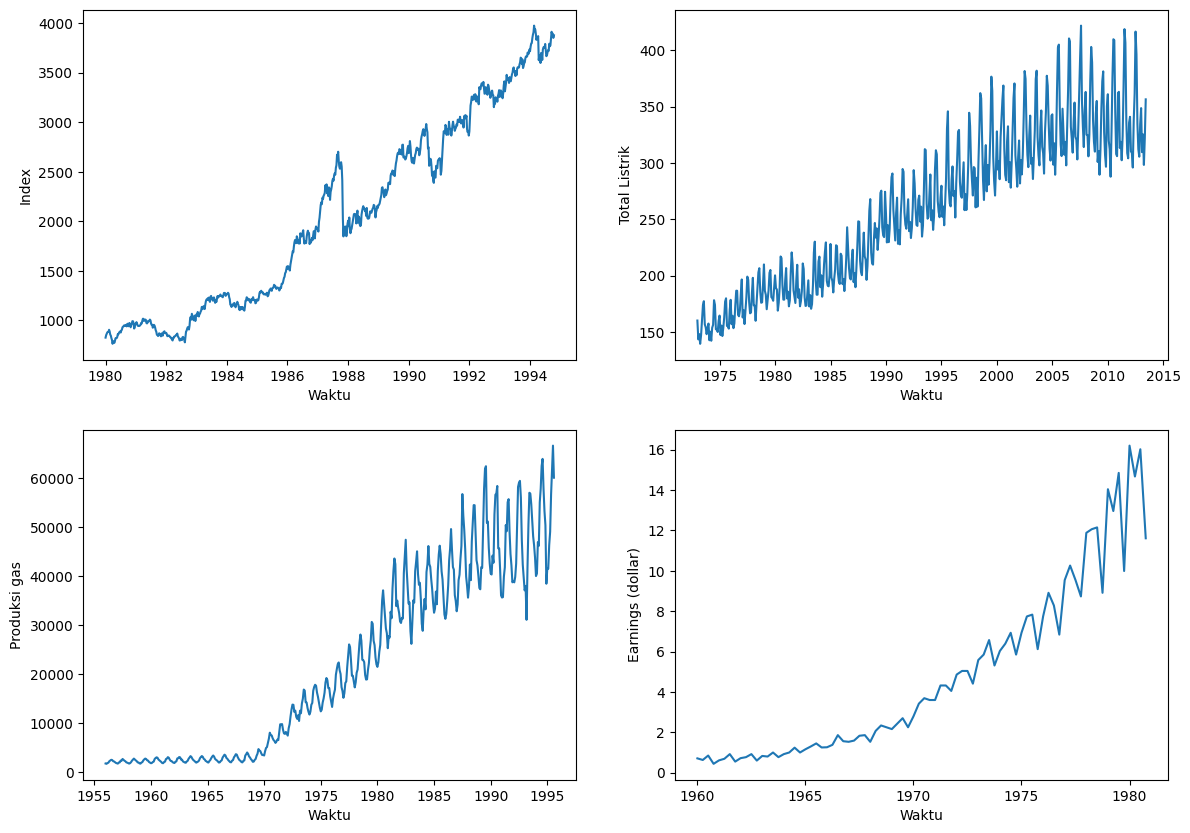

In [4]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(djf.time, djf.value)
plt.xlabel('Waktu'), plt.ylabel('Index')
plt.subplot(222)
plt.plot(elec.time, elec.value)
plt.xlabel('Waktu'), plt.ylabel('Total Listrik')
plt.subplot(223)
plt.plot(gas.time, gas.value)
plt.xlabel('Waktu'), plt.ylabel('Produksi gas')
plt.subplot(224)
plt.plot(johnson.time, johnson.JohnsonJohnson)
plt.xlabel('Waktu'), plt.ylabel('Earnings (dollar)')

plt.show()

Hanya karena deret terlihat meningkat atau menurun secara linear, belum tentu kelinearan memang termuat dalam proses dan akan bertahan di waktu seterusnya. Deret-deret yang tidak stasioner seperti di atas tidak dapat dimodelkan dengan model stasioner seperti yang telah dibahas sebelumnya (AR, MA, ARMA), dan tidak dapat digunakan untuk melakukan peramalan nilai deret untuk waktu ke depan.

Selain berdasarkan plot deret waktu kestasioneran deret dapat kita lihat dari plot ACF dan PACF contoh.

Misalkan digunakan deret produksi gas bulanan di Australia yang ditunjukkan oleh gambar ketiga (baris 2 kolom 1).

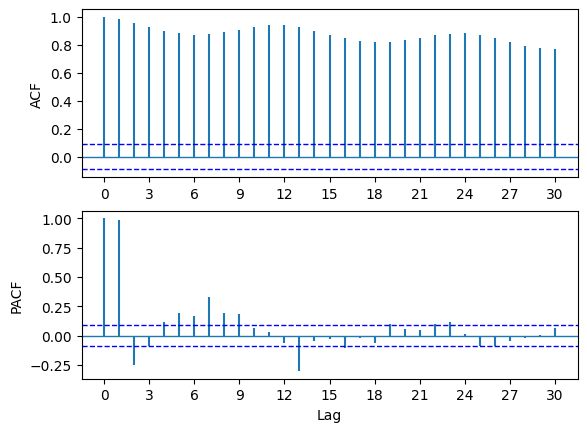

In [5]:
acf_pacf_fig(gas.value, both=True, lag=30)

Perhatikan plot ACF dan PACF yang diperoleh. Apa perbedaan pola ACF dan PACF tersebut dengan plot ACF dan PACF dari deret yang stasioner?

In [6]:
from statsmodels.tsa.stattools import adfuller
adfuller(gas.value, autolag='AIC')[1]

0.9822499353484767

Nilai di atas merupakan *p-value* hasil uji akar satuan Dickey-Fuller. Hipotesis yang digunakan dalam uji ADF adalah $H_0$ menyatakan deret tidak stasioner, dan $H_1$ menyatakan deret stasioner.

Karena **p-value yang diperoleh lebih besar dari 0.05**, dalam hal ini kita tidak tolak $H_0$ sehingga kita yakin bahwa deret tersebut **tidak stasioner**.

In [7]:
from scipy.stats import boxcox,  boxcox_llf
data,lambda_fit,ci=boxcox(gas.value, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  0.19239279614793578
interval kepercayaan lambda: (0.09563943441927816, 0.28941224170449237)


Berdasarkan hasil box-cox apakah deret stasioner dalam ragam?

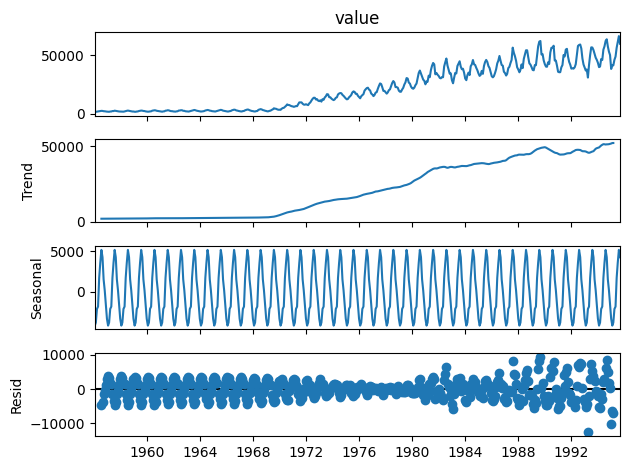

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
gas['time'] = pd.date_range(start='1956', periods=len(gas), freq='M')
gas.set_index('time', inplace=True)
result = seasonal_decompose(gas.value, model='additive')
result.plot()
plt.show()

Insight apa dari hasil dekomposisi tersebut?

<h1> Pembedaan (Differencing) </h1>

Diberikan model AR (1) dengan nilai $\phi=1$ yaitu:

<center> $Y_t=Y_{t-1}+e_t$ </center>

**pembedaan pertama** untuk suatu deret tersebut dinyatakan sebagai berikut:

<center> $\Delta Y_t=e_t$ </center>

dengan $\Delta Y_t=Y_t-Y_{t-1}$

Untuk mengilustrasikan pembedaan digunakan deret buatan yang sudah ada di dalam package Python. Untuk melakukan pembedaan dapat menggunakan fungsi `diff()`. Fungsi `diff()` dapat digunakan untuk data dengan struktur **dataframe**.

In [9]:
fake=get_rdataset('fakeTSD',package='stevedata').data

In [10]:
fake.head()

,year,y,x1,x2,e
0,1920,501.432593,3.006835,1,-0.319116
1,1921,503.775550,6.443648,1,0.914638
2,1922,502.864136,3.765582,0,1.422741
3,1923,501.915595,9.058783,0,-1.099101
4,1924,503.177995,7.130832,1,-0.604713


Data yang digunakan adalah data pada kolom `y`

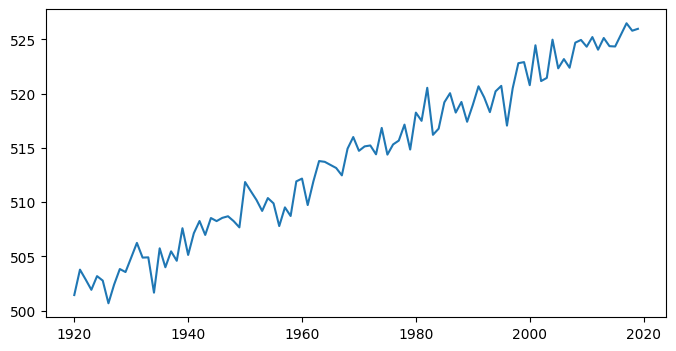

In [11]:
plt.figure(figsize=(8,4))
plt.plot(fake.year, fake.y)
plt.show()

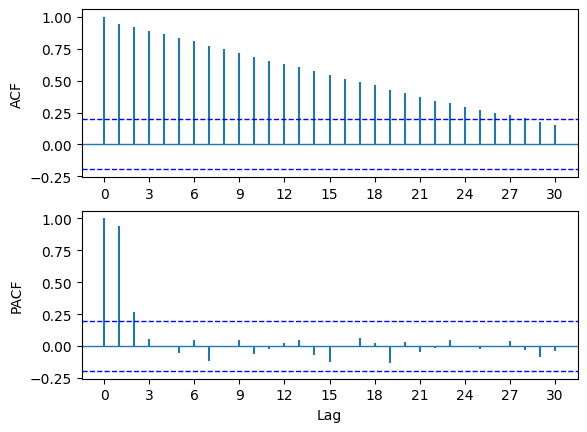

In [12]:
acf_pacf_fig(fake.y, both=True, lag=30)

In [13]:
adfuller(fake.y, autolag='AIC')[1]

0.9237678246096355

In [14]:
data,lambda_fit,ci=boxcox(fake.y, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  2.284318245792919
interval kepercayaan lambda: (-12.955764706844885, 17.59522680932058)


**Pada bagian ini difokuskan untuk penanganan masalah ketidakstasioneran dalam nilaitengah**

In [15]:
fake_diff=fake.y.diff().dropna()

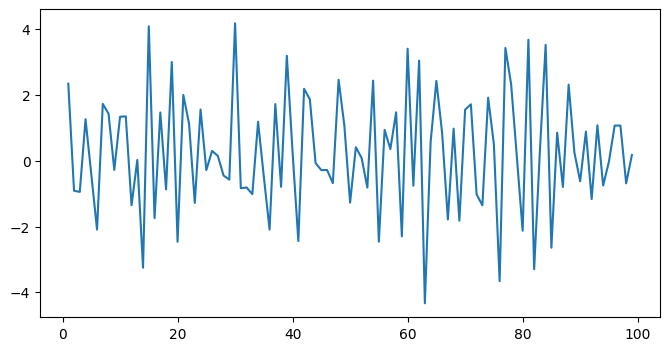

In [16]:
plt.figure(figsize=(8,4))
plt.plot(fake_diff)
plt.show()

Bagaimana interpretasi Anda terkait deret hasil pembedaan pertama?

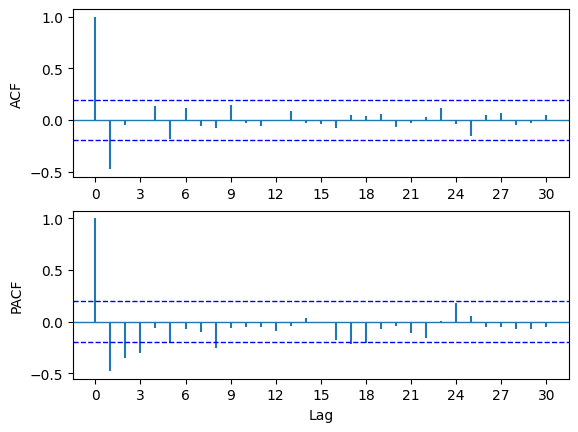

In [17]:
acf_pacf_fig(fake_diff, both=True, lag=30)

In [18]:
adfuller(fake_diff, autolag='AIC')[1]

4.028025394463314e-18

Bagaimana interpretasi Anda dari plot ACF dan PACF deret hasil pembedaan pertama?

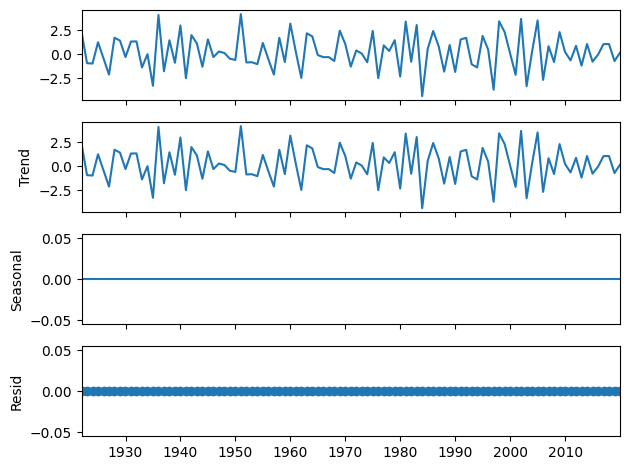

In [19]:
df_fake=pd.DataFrame(fake_diff)
df_fake['timeindex']= pd.date_range(start='1921', periods=len(df_fake), freq='Y')
df_fake.set_index('timeindex', inplace=True)
result = seasonal_decompose(df_fake, model='additive')
result.plot()
plt.show()

Dari hasil dekomposisi apakah masih terdapat tren (kecenderungan) dalam deret?

<h3> Pembedaan berlebihan </h3>

Pembedaan dapat diperluas ke pembedaan kedua, ketiga, dan seterusnya, sehingga rawan terjadi pembedaan yang berlebihan. pembedaan yang berlebihan menambah adanya korelasi yang tidak penting dalam deret dan akan membuat proses pemodelan deret menjadi lebih rumit.


In [20]:
fake_diff_2=fake_diff.diff().dropna()

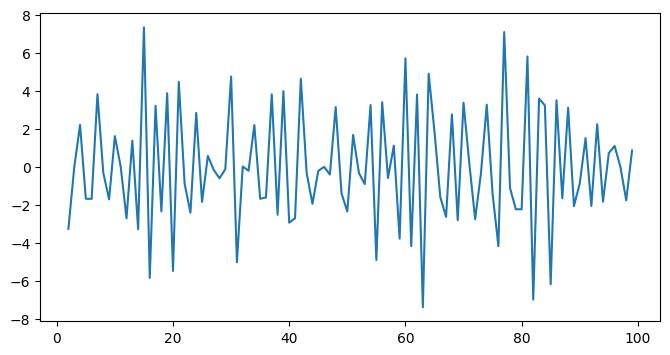

In [21]:
plt.figure(figsize=(8,4))
plt.plot(fake_diff_2)
plt.show()

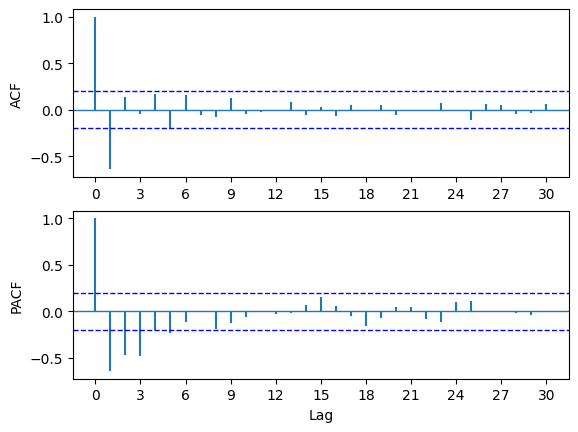

In [22]:
acf_pacf_fig(fake_diff_2, both=True, lag=30)

In [23]:
adfuller(fake_diff_2, autolag='AIC')[1]

5.06167041194093e-07

Ilutrasi lain untuk pembedaan berlebihan digunakan deret langkah acak

In [24]:
np.random.seed(10)
lacak=[np.random.normal(0,1)]

for i in range(100):
    lacak.append(lacak[-1]+np.random.normal(0,1))

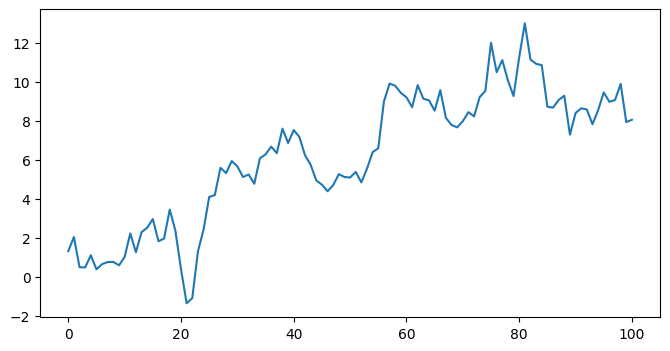

In [25]:
plt.figure(figsize=(8,4))
plt.plot(lacak)
plt.show()

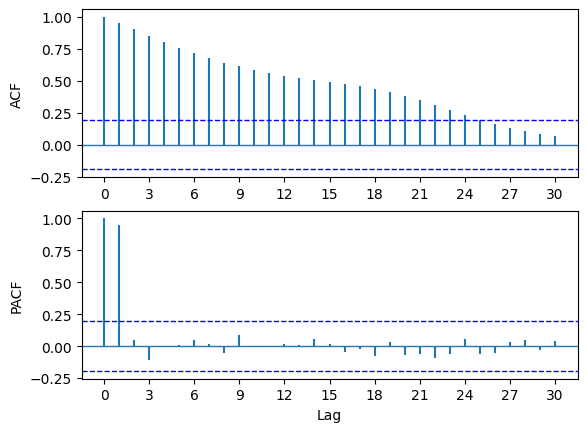

In [26]:
acf_pacf_fig(lacak, both=True, lag=30)

In [27]:
adfuller(lacak, autolag='AIC')[1]

0.41557295502321734

In [28]:
lacak_diff=pd.DataFrame(lacak).diff().dropna()

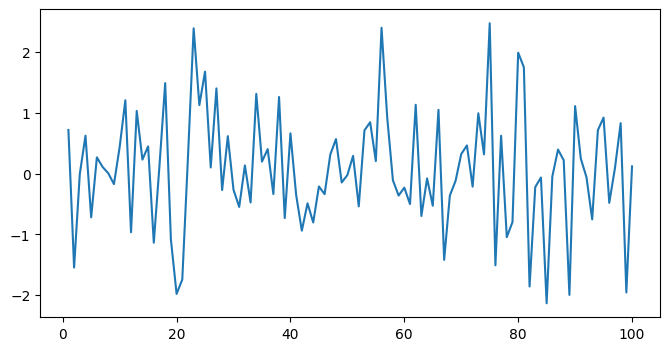

In [29]:
plt.figure(figsize=(8,4))
plt.plot(lacak_diff)
plt.show()

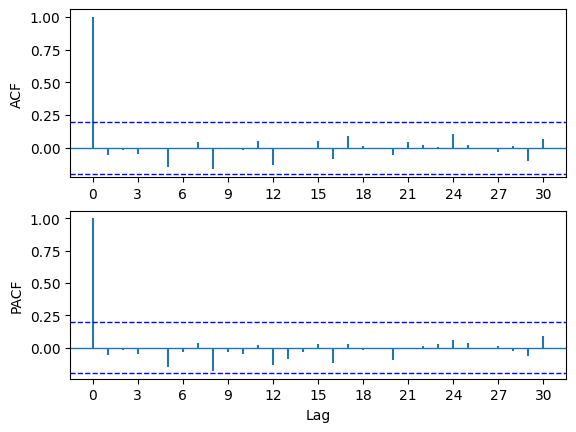

In [30]:
acf_pacf_fig(lacak_diff, both=True, lag=30)

In [31]:
adfuller(lacak_diff, autolag='AIC')[1]

1.6042178753829506e-18

Deret hasil pembedaan pertama apakah sudah stasioner?

In [32]:
lacak_diff_2=lacak_diff.diff().dropna()

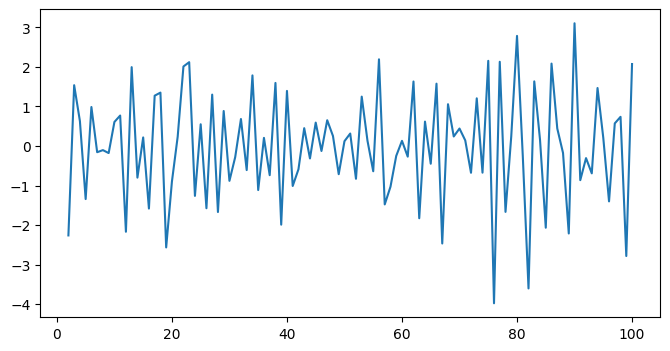

In [33]:
plt.figure(figsize=(8,4))
plt.plot(lacak_diff_2)
plt.show()

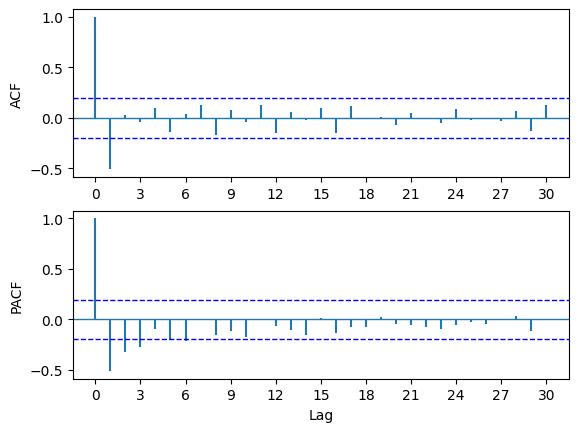

In [34]:
acf_pacf_fig(lacak_diff_2, both=True, lag=30)

In [35]:
adfuller(lacak_diff_2, autolag='AIC')[1]

5.364295255320921e-10

Plot ACF dan PACF contoh untuk deret hasil pembedaan kedua menunjukkan adanya korelasi yang signifikan pada lag 1. Berdasarkan plot tersebut, kita kemungkinan akan menganggap model ARIMA (1,2,1) sesuai untuk deret asli langkah acak ini dan menduga parameter MA yang tidak diperlukan.

Pembedaan berlebihan memiliki beberapa konsekuensi, diantaranya: kehilangan informasi yang penting, sulit dalam interpretasi, ragam meningkat, munculnya struktur autokorelasi yang tidak diinginkan.

**Untuk menghindari pembedaan yang berlebihan, disarankan untuk melihat dengan cermat hasil dari setiap pembedaan yang dilakukan dan selalu mengingat prinsip kesederhaan model.**

<h1> Transformasi Box-Cox </h1>

Transformasi Box-Cox atau transformasi pangkat digunakan untuk transformasi deret yang **tidak stasioner dalam ragam**. Transformasi Box-Cox didefinisikan sebagai berikut:

$g(x)=\frac{x^\lambda-1}{\lambda}\;\;\; untuk \lambda\ne 0$

$g(x)=\log x \;\;\; untuk \lambda=0$

Perhatikan jika 𝜆 = 1/2 maka menghasilkan transformasi akar kuadrat (jenis transformasi untuk nilai $\lambda$ yang lain dapat dilihat dalam Notodiputro et al 2025).

Transformasi pangkat hanya bisa diaplikasikan terhadap **data yang bernilai positif**. Jika terdapat nilai negatif atau nol, suatu konstanta positif dapat ditambahkan terhadap semua nilai data untuk memperoleh nilai data yang positif sebelum dilakukan transformasi pangkat.

Ilustrasikan menggunakan deret konsumsi listrik bulanan (plot deret sudah ditampilkan di atas, Gambar pada baris 1 kolom 2).

In [36]:
elec=get_rdataset('usmelec',package='fpp2').data

In [37]:
elec.head()

,time,value
0,1973.000000,160.218
1,1973.083333,143.539
2,1973.166667,148.158
3,1973.250000,139.589
4,1973.333333,147.395


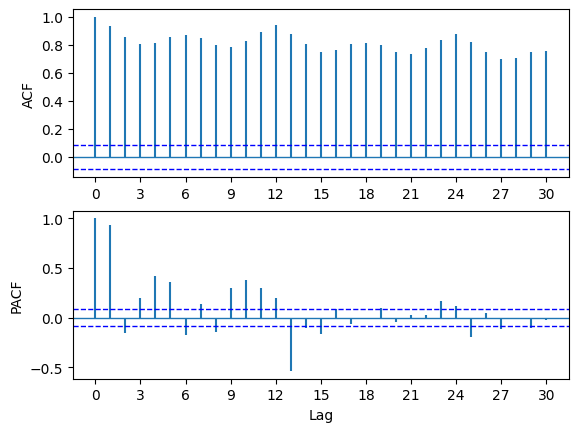

In [38]:
acf_pacf_fig(elec.value, both=True, lag=30)

In [39]:
data,lambda_fit,ci=boxcox(elec.value, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  0.4784891618659173
interval kepercayaan lambda: (0.12574071836905637, 0.8316106710351674)


Diperoleh nilai $\lambda$ optimum untuk deret konsumsi listrik bulanan adalah 0.5, sehingga transformasi yang sesuai adalah akar kuadrat.

In [40]:
elec_sqrt=np.sqrt(elec.value)

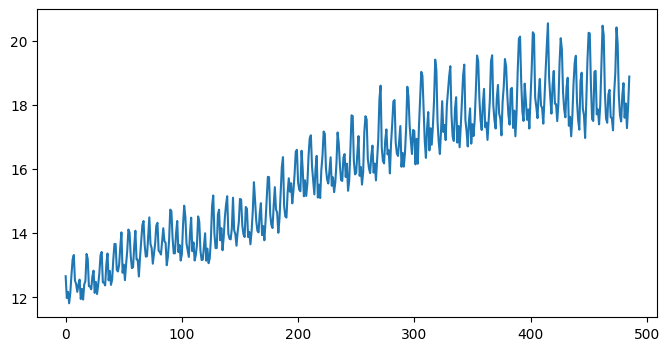

In [41]:
plt.figure(figsize=(8,4))
plt.plot(elec_sqrt)
plt.show()

In [42]:
data,lambda_fit,ci=boxcox(elec_sqrt, alpha=0.05)

print(f'nilai lambda: ',lambda_fit)
print(f'interval kepercayaan lambda:', ci)

nilai lambda:  0.95697835401859
interval kepercayaan lambda: (0.25148143673808393, 1.6632213420703725)


Berdasarkan hasil transformasi kuadrat apakah deret menjadi stasioner dalam ragam?

In [43]:
elec_diff=elec_sqrt.diff().dropna()

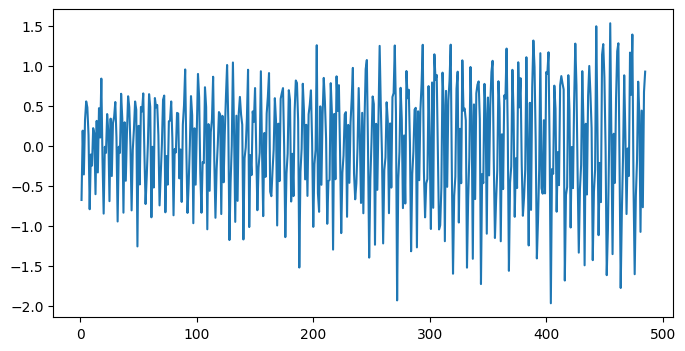

In [44]:
plt.figure(figsize=(8,4))
plt.plot(elec_diff)
plt.show()

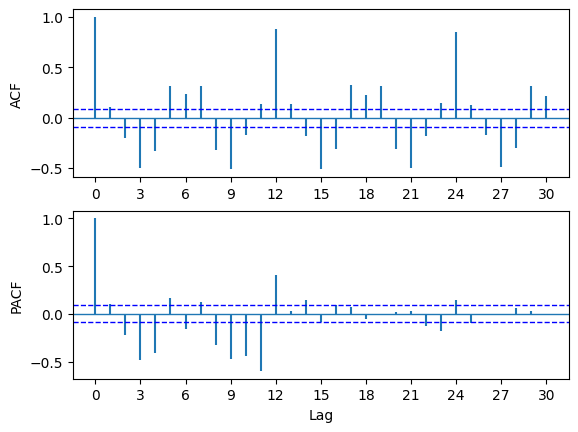

In [45]:
acf_pacf_fig(elec_diff, both=True, lag=30)

In [46]:
adfuller(elec_diff, autolag='AIC')[1]

2.3261528666649477e-06

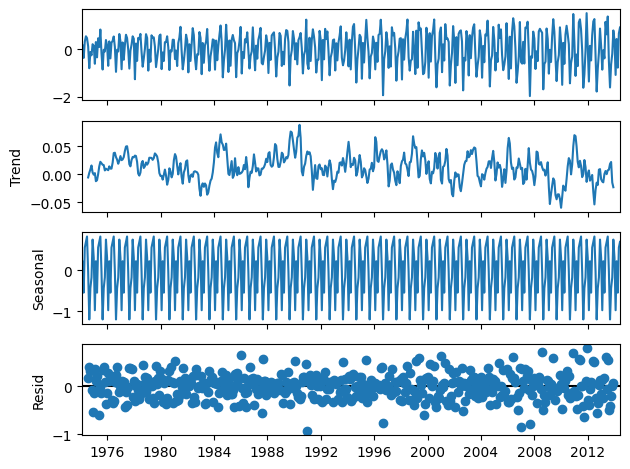

In [47]:
df_electric=pd.DataFrame(elec_diff)
df_electric['timeindex']= pd.date_range(start='1974', periods=len(df_electric), freq='M')
df_electric.set_index('timeindex', inplace=True)
result = seasonal_decompose(df_electric, model='additive')
result.plot()
plt.show()